<a href="https://colab.research.google.com/github/atul2017/AppliedAI/blob/main/ap_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install -q nltk spacy docx2txt pandas matplotlib wordcloud

# Download NLTK data
import nltk
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stop words
nltk.download('wordnet')      # For lemmatization
nltk.download('averaged_perceptron_tagger') # For POS tagging
nltk.download('omw-1.4')      # For WordNet data
nltk.download('punkt_tab')    # Download the missing resource for sentence tokenization


# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
######
### Note: For loading .docx files, you would typically do:

# import docx2txt
# try:
#     text = docx2txt.process("your_document.docx")
#     print(text)
# except Exception as e:
#     print(f"Error loading docx: {e}")

In [ ]:
sample_document = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, machine learning is also referred to as predictive analytics.
"""

In [ ]:
noisy_text = """
Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!).
Visit our site: http://example.com for more info.
This is awesome!!! We collected 1,234 data points.
Softbank and Google are major players.
"""

In [ ]:
print("--- Sample Document ---")
print(sample_document)
print("\n--- Noisy Text ---")
print(noisy_text)

--- Sample Document ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, mach

In [ ]:
import re
import string

# Combine texts
raw_text = sample_document + "\n" + noisy_text

print("Original Raw Text Length:", len(raw_text))
print("--- --------------------------- ---")
print("--- Original Raw Text ---")
print(raw_text)

Original Raw Text Length: 1254
--- --------------------------- ---
--- Original Raw Text ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsu

In [ ]:
#This step is for converting all letters to lower case. This is required for example India and india are treated as two different words by the computer
cleaned_text = raw_text.lower()

print("\n--- After Lowercasing ---")
print(cleaned_text)


--- After Lowercasing ---

machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, m

In [ ]:
#This is to remove URLs as a part of text cleaning
#You don't need to remember code, you can use the ChatGpt or gemini prompt for example "Give me a python function which can remove URLs from text"
import re

def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'

    # Use re.sub() to replace all occurrences of the pattern with an empty string.
    cleaned_text = re.sub(url_pattern, '', text)

    return cleaned_text

In [ ]:
cleaned_text = remove_urls(cleaned_text)
print(cleaned_text)


machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, machine learning is also ref

In [ ]:
#let's remove all the punchuation from the cleaned text

string.punctuation
translator = str.maketrans('','', string.punctuation)
cleaned_text = cleaned_text.translate(translator)
cleaned_text

'\nmachine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task\n\nmachine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning\n\nin its application across business problems machine learning is also referred to as 

In [ ]:
#Remove all the numbers from the cleaned text
cleaned_text = re.sub(r'\d+', '', cleaned_text)
cleaned_text

'\nmachine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task\n\nmachine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning\n\nin its application across business problems machine learning is also referred to as 

In [ ]:
#replace all sequences of one or more whitespace characters with a single space in the cleaned_text string.
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
print("\n--- After Removing Extra Whitespace ---")
print(cleaned_text)


--- After Removing Extra Whitespace ---
 machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning in its application across business problems machine

In [ ]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#In this step we are tokenizing the text into sentences. We can do using NTLK or spacy. Here we see the example of both NTLK and spacy
# Example - Hello I am shivank. This is AI class. hello everyone
#Output Hello I am shivank.
# This is AI class.
#hello everyone

from nltk.tokenize import sent_tokenize
import spacy

# Load the small English spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk_sentences = sent_tokenize(raw_text)

In [ ]:
nltk_sentences

['\nMachine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.',
 'Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.',
 'Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.',
 'A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.',
 'Mathematical optimization delivers methods, theory and application domains to the field of machine learning.',
 'Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.',
 'In its application across business problems, mac

In [ ]:
for i, sentence in enumerate(nltk_sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.
Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.
Sen

In [ ]:
spacy_doc_raw = nlp(raw_text)

In [ ]:
spacy_doc_raw.sents

In [ ]:
spacy_sentences = [sent.text for sent in spacy_doc_raw.sents]
spacy_sentences


['\nMachine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.',
 'Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.\n\n',
 'Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.',
 'A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.',
 'Mathematical optimization delivers methods, theory and application domains to the field of machine learning.',
 'Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.\n\n',
 'In its application across business probl

In [ ]:
#enumerate the spacy sentences
for i, sentence in enumerate(spacy_sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.


Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.



In [ ]:
#The way we toeknize the sentence we can also tokenize the word using spacy or nltk
#following is the example of nltk

from nltk.tokenize import word_tokenize
nltk_word_tokens = word_tokenize(cleaned_text)
nltk_word_tokens[:10]

['machine',
 'learning',
 'ml',
 'is',
 'a',
 'field',
 'of',
 'study',
 'in',
 'artificial']

In [ ]:
#following is the example of spacy
spacy_doc_cleaned = nlp(cleaned_text)
spacy_word_tokens = [token.text for token in spacy_doc_cleaned]
spacy_word_tokens[:10]

[' ', 'machine', 'learning', 'ml', 'is', 'a', 'field', 'of', 'study', 'in']

In [ ]:
#Let's remove stop words from the cleaned text. The stop words are like is, the, there etc.
#Following code is using the nltk
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english'))
nltk_tokens_no_stop_words = [word for word in nltk_word_tokens if word not in nltk_stop_words]
nltk_tokens_no_stop_words

['machine',
 'learning',
 'ml',
 'field',
 'study',
 'artificial',
 'intelligence',
 'concerned',
 'development',
 'computer',
 'algorithms',
 'learn',
 'make',
 'predictions',
 'data',
 'algorithms',
 'build',
 'mathematical',
 'model',
 'based',
 'sample',
 'data',
 'known',
 'training',
 'data',
 'order',
 'make',
 'predictions',
 'decisions',
 'without',
 'explicitly',
 'programmed',
 'perform',
 'task',
 'machine',
 'learning',
 'algorithms',
 'used',
 'wide',
 'variety',
 'applications',
 'email',
 'filtering',
 'computer',
 'vision',
 'difficult',
 'infeasible',
 'develop',
 'conventional',
 'algorithms',
 'perform',
 'needed',
 'tasks',
 'subset',
 'machine',
 'learning',
 'closely',
 'related',
 'computational',
 'statistics',
 'focuses',
 'making',
 'predictions',
 'using',
 'computers',
 'mathematical',
 'optimization',
 'delivers',
 'methods',
 'theory',
 'application',
 'domains',
 'field',
 'machine',
 'learning',
 'data',
 'mining',
 'related',
 'field',
 'study',
 'focu

In [ ]:
#Let's remove stop words from the cleaned text. The stop words are like is, the, there etc.
#Following code is using the spacy

spacy_tokens_no_stop_words = [token.text for token in spacy_doc_cleaned if not token.is_stop]
spacy_tokens_no_stop_words[:20]

[' ',
 'machine',
 'learning',
 'ml',
 'field',
 'study',
 'artificial',
 'intelligence',
 'concerned',
 'development',
 'computer',
 'algorithms',
 'learn',
 'predictions',
 'data',
 'algorithms',
 'build',
 'mathematical',
 'model',
 'based']

In [ ]:
#let's remove words which are similar and keep one unique copy of it. For example - running->run or sets->set etc.
#This can be done using both nltk and spacy. Following example is nltk

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet


# --- Stemming with NLTK (PorterStemmer) ---
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in nltk_tokens_no_stop_words]
print("--- Stemmed Tokens (NLTK PorterStemmer) ---")
stemmed_tokens[:20]


--- Stemmed Tokens (NLTK PorterStemmer) ---


['machin',
 'learn',
 'ml',
 'field',
 'studi',
 'artifici',
 'intellig',
 'concern',
 'develop',
 'comput',
 'algorithm',
 'learn',
 'make',
 'predict',
 'data',
 'algorithm',
 'build',
 'mathemat',
 'model',
 'base']

In [ ]:
#Following example is spacy
spacy_lemmatized_tokens = [token.lemma_ for token in spacy_doc_cleaned if not token.is_stop]
print("\n--- Lemmatized Tokens (spacy) ---")
spacy_lemmatized_tokens[:20]



--- Lemmatized Tokens (spacy) ---


[' ',
 'machine',
 'learning',
 'ml',
 'field',
 'study',
 'artificial',
 'intelligence',
 'concern',
 'development',
 'computer',
 'algorithm',
 'learn',
 'prediction',
 'datum',
 'algorithm',
 'build',
 'mathematical',
 'model',
 'base']

In [ ]:
texts = [
    "Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!). Visit our site: http://example.com for more info.",
    "This is awesome!!! We collected 1,234 data points.",
    "Softbank and Google are major players.",
    "Predictive analytics uses machine learning to solve business problems.",
]

In [ ]:
#The following funcion is combining all commands we have learnt above and you write one function in the real world programming which takes care of cleaning the text

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process text with SpaCy
    doc = nlp(text)

    # Lemmatization + remove stopwords + tokens length > 1 (to skip leftover punct or spaces)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]

    # Join back to string
    cleaned_text = " ".join(tokens)
    return cleaned_text

cleaned_texts = [clean_text(text) for text in texts]

print("Cleaned Texts:")
for i, txt in enumerate(cleaned_text, 1):
    print(f"{i}: {txt}")

Cleaned Texts:
1:  
2: m
3: a
4: c
5: h
6: i
7: n
8: e
9:  
10: l
11: e
12: a
13: r
14: n
15: i
16: n
17: g
18:  
19: m
20: l
21:  
22: i
23: s
24:  
25: a
26:  
27: f
28: i
29: e
30: l
31: d
32:  
33: o
34: f
35:  
36: s
37: t
38: u
39: d
40: y
41:  
42: i
43: n
44:  
45: a
46: r
47: t
48: i
49: f
50: i
51: c
52: i
53: a
54: l
55:  
56: i
57: n
58: t
59: e
60: l
61: l
62: i
63: g
64: e
65: n
66: c
67: e
68:  
69: c
70: o
71: n
72: c
73: e
74: r
75: n
76: e
77: d
78:  
79: w
80: i
81: t
82: h
83:  
84: t
85: h
86: e
87:  
88: d
89: e
90: v
91: e
92: l
93: o
94: p
95: m
96: e
97: n
98: t
99:  
100: o
101: f
102:  
103: c
104: o
105: m
106: p
107: u
108: t
109: e
110: r
111:  
112: a
113: l
114: g
115: o
116: r
117: i
118: t
119: h
120: m
121: s
122:  
123: t
124: h
125: a
126: t
127:  
128: c
129: a
130: n
131:  
132: l
133: e
134: a
135: r
136: n
137:  
138: f
139: r
140: o
141: m
142:  
143: a
144: n
145: d
146:  
147: m
148: a
149: k
150: e
151:  
152: p
153: r
154: e
155: d
156: i
1

In [ ]:
#Let's see the bag of words application on cleaned texts

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(cleaned_texts)
bow_matrix.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0]])

The bag of words revision-


```
# This is formatted as code
I love india
I love ML

Words                I love india ML

First line-          1  1   1    0

Second line-         1  1   0    1
```



In [ ]:
vectorizer.get_feature_names_out()

array(['analytic', 'awesome', 'beyond', 'business', 'collect', 'data',
       'google', 'info', 'learn', 'learning', 'machine', 'major',
       'player', 'point', 'predictive', 'problem', 'revolutionize',
       'rock', 'site', 'softbank', 'solve', 'use', 'visit', 'world'],
      dtype=object)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
bol_values = bow_matrix.toarray()
df_bow = pd.DataFrame(bol_values, columns=feature_names)
df_bow

,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
0,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
1,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0


In [ ]:
#Following code example covers how to tag each token/word with correpodning grammer terms. For example if the word/token is noun then tag it with noun, verbs etc.

for i, token in enumerate(spacy_doc_cleaned):
    print(f"{token.text}: {token.pos_} ({token.tag_})")

 : SPACE (_SP)
machine: NOUN (NN)
learning: NOUN (NN)
ml: PROPN (NNP)
is: AUX (VBZ)
a: DET (DT)
field: NOUN (NN)
of: ADP (IN)
study: NOUN (NN)
in: ADP (IN)
artificial: ADJ (JJ)
intelligence: NOUN (NN)
concerned: VERB (VBN)
with: ADP (IN)
the: DET (DT)
development: NOUN (NN)
of: ADP (IN)
computer: NOUN (NN)
algorithms: NOUN (NNS)
that: PRON (WDT)
can: AUX (MD)
learn: VERB (VB)
from: ADP (IN)
and: CCONJ (CC)
make: VERB (VB)
predictions: NOUN (NNS)
on: ADP (IN)
data: NOUN (NNS)
algorithms: NOUN (NNS)
build: VERB (VB)
a: DET (DT)
mathematical: ADJ (JJ)
model: NOUN (NN)
based: VERB (VBN)
on: ADP (IN)
sample: NOUN (NN)
data: NOUN (NNS)
known: VERB (VBN)
as: ADP (IN)
training: VERB (VBG)
data: NOUN (NNS)
in: ADP (IN)
order: NOUN (NN)
to: PART (TO)
make: VERB (VB)
predictions: NOUN (NNS)
or: CCONJ (CC)
decisions: NOUN (NNS)
without: ADP (IN)
being: AUX (VBG)
explicitly: ADV (RB)
programmed: VERB (VBN)
to: PART (TO)
perform: VERB (VB)
the: DET (DT)
task: NOUN (NN)
machine: NOUN (NN)
learning: V

In [ ]:
#Following code example covers how to find out and print nouns from the text

for chunk in spacy_doc_cleaned.noun_chunks:
    print(chunk.text)


 machine learning ml
a field
study
artificial intelligence
the development
computer algorithms
that
predictions
data algorithms
a mathematical model
sample data
data
order
predictions
decisions
the task machine learning algorithms
a wide variety
applications
email filtering and computer vision
it
conventional algorithms
the needed tasks
a subset
machine learning
computational statistics
which
predictions
computers
mathematical optimization
methods theory
application domains
the field
data mining
a related field
study
exploratory data analysis
unsupervised learning
its application
business problems machine learning
predictive analytics machine learning
the world
our site
more info
this
we
google
major players


In [ ]:
#Following code actually writes the entity attributes for detected entities. For example detect date in text, organization in text and print them

for ent in spacy_doc_raw.ents: # Accessing .ents attribute for detected entities
    if ent.label_ in ['ORG', 'GPE', 'PERSON', 'DATE', 'CARDINAL', 'LOC']: # Filter for common entity types
         print(f"Entity: {ent.text}, Type: {ent.label_}")


Entity: ML, Type: ORG
Entity: 2023, Type: DATE
Entity: 1,234, Type: CARDINAL
Entity: Google, Type: ORG


In [ ]:
#Senitmate analysis library and packages
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#sentimante analysis
analyzer = SentimentIntensityAnalyzer()
sentence_for_sentiment = "Machine learning is a field of study in artificial intelligence."
vs = analyzer.polarity_scores(sentence_for_sentiment)
print("\n--- Sentiment Analysis with NLTK's VADER ---")
print(f"Sentence: {sentence_for_sentiment}")
print(f"VADER Polarity Scores: {vs}")


--- Sentiment Analysis with NLTK's VADER ---
Sentence: Machine learning is a field of study in artificial intelligence.
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}


VADER Polarity Scores: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}

Neg = 0%

Nue= 72% Nuetral

pos = 27% Positive

Compound = 47% (Overall score - if it is in the range > 50% it is positive sentiments




In [ ]:
sentence_for_sentiment_2 = "Machine learning rocks! This is awesome!!!"
vs = analyzer.polarity_scores(sentence_for_sentiment_2)
print("\n--- Sentiment Analysis with NLTK's VADER ---")
print(f"Sentence: {sentence_for_sentiment_2}")
print(f"VADER Polarity Scores: {vs}")


--- Sentiment Analysis with NLTK's VADER ---
Sentence: Machine learning rocks! This is awesome!!!
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.7405}


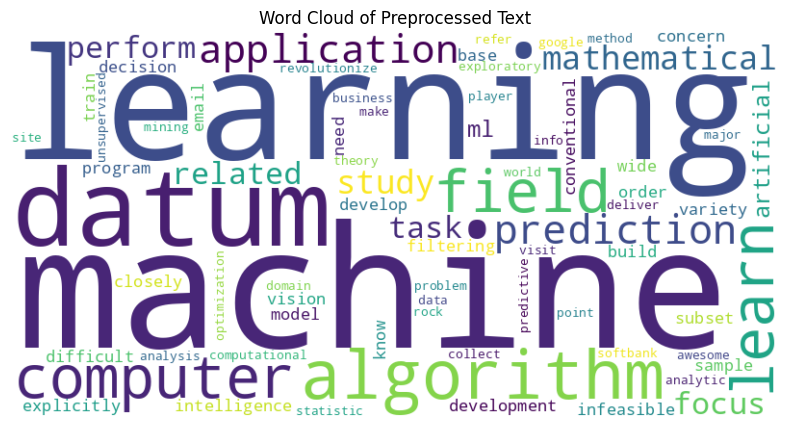

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the lemmatized tokens after stop word removal for the word cloud
# Join the list of tokens back into a single string

wordcloud_text = " ".join(spacy_lemmatized_tokens) # Using spaCy lemmatized tokens

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Preprocessed Text")
plt.show()